<a href="https://colab.research.google.com/github/Mattalukkal/Ai_ML/blob/main/Assignment_on_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify and treat missing values in the society column.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Bengaluru_House_Data.csv')

print("DataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

DataFrame Head:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0   Coomee       1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type  

In [ ]:
print("Missing values in 'society' column before imputation:")
print(df['society'].isnull().sum())

df['society'] = df['society'].fillna('NoSociety')

print("\nValue counts of 'society' column after imputation:")
print(df['society'].value_counts())

Missing values in 'society' column before imputation:
5502

Value counts of 'society' column after imputation:
society
NoSociety    5502
GrrvaGr        80
PrarePa        76
Prtates        59
Sryalan        59
             ... 
SJces R         1
Shamzm          1
Vemit S         1
NantsGa         1
PronsAs         1
Name: count, Length: 2689, dtype: int64


## Check for Outliers in 'price' Column

### Subtask:
Visualize the distribution of the 'price' column using a box plot and/or histogram. Propose and justify an outlier detection method (e.g., IQR method) and identify rows that are considered outliers based on this method. Display the identified outlier rows.


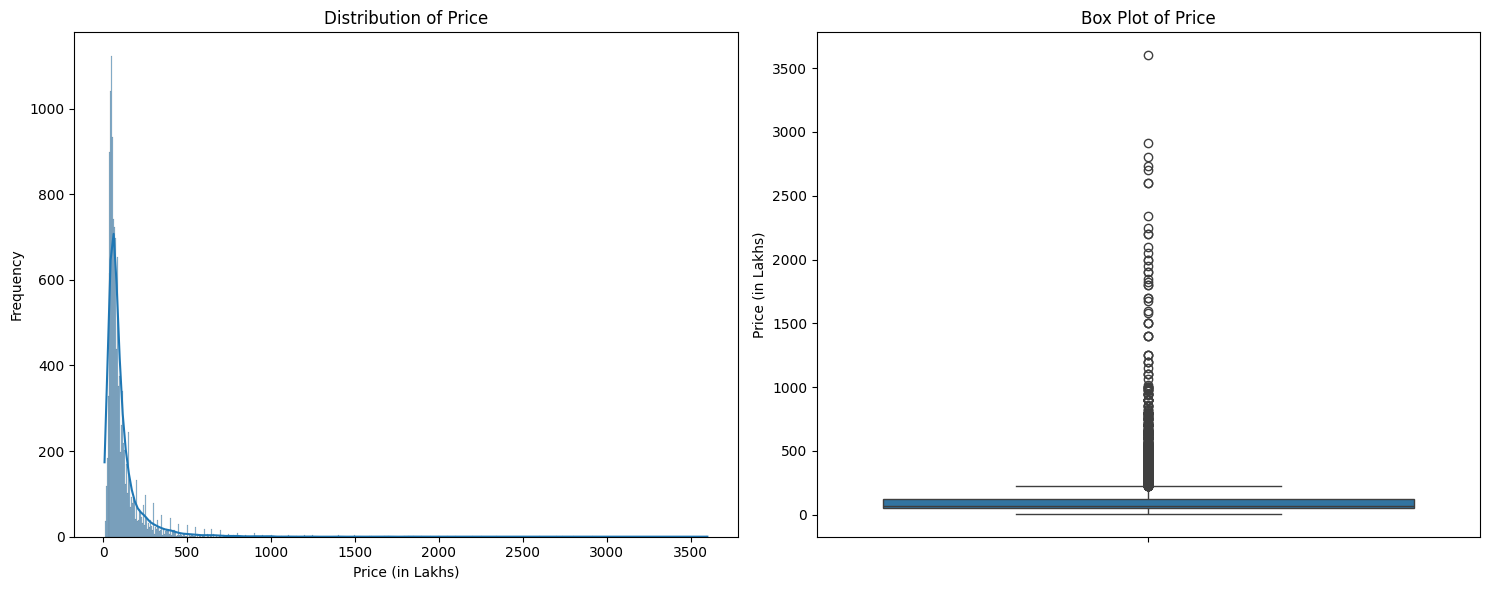


Q1 (25th percentile): 50.0
Q3 (75th percentile): 120.0
IQR: 70.0
Lower bound for outliers: -55.0
Upper bound for outliers: 225.0

Number of outlier rows identified: 1276

Outlier Rows in 'price' column:
                  area_type   availability               location       size  \
7      Super built-up  Area  Ready To Move           Rajaji Nagar      4 BHK   
9                Plot  Area  Ready To Move           Gandhi Bazar  6 Bedroom   
11               Plot  Area  Ready To Move             Whitefield  4 Bedroom   
18     Super built-up  Area  Ready To Move  Ramakrishnappa Layout      3 BHK   
22               Plot  Area  Ready To Move            Thanisandra  4 Bedroom   
...                     ...            ...                    ...        ...   
13306            Plot  Area  Ready To Move  Rajarajeshwari Nagara  4 Bedroom   
13311            Plot  Area  Ready To Move       Ramamurthy Nagar  7 Bedroom   
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram of 'price'
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')

# Subplot 2: Box plot of 'price'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price (in Lakhs)')

plt.tight_layout()
plt.show()

# Calculate Q1, Q3, and IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identify and display outlier rows
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"\nNumber of outlier rows identified: {len(outliers)}")
print("\nOutlier Rows in 'price' column:")
print(outliers)

## Handle Outliers and Clean Dataset

### Subtask:
Remove the identified outlier rows from the DataFrame. Display the shape of the DataFrame before and after removing the outliers to confirm the reduction in rows. Briefly describe the impact of outlier removal on the dataset.

In [ ]:
print(f"DataFrame shape before outlier removal: {df.shape}")
df_cleaned = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]
print(f"DataFrame shape after outlier removal: {df_cleaned.shape}")

DataFrame shape before outlier removal: (13320, 9)
DataFrame shape after outlier removal: (12044, 9)


## Summary of Preprocessing Steps and Results

### Subtask:
Provide a concise summary of all preprocessing steps performed, including loading the dataset, handling missing values in 'society', detecting and removing outliers in 'price', and the impact of these operations on the dataset.

### Preprocessing Summary:

1.  **Dataset Loading:** The 'Bengaluru_House_Data.csv' dataset was successfully loaded into a pandas DataFrame. It initially contained 13320 entries and 9 columns, with several columns showing missing values.

2.  **Missing Value Imputation in 'society' column:**
    *   Identified 5502 missing values in the 'society' column.
    *   Missing values were imputed by replacing them with the string 'NoSociety'. This approach was chosen to explicitly denote properties without society information, rather than discarding valuable rows or inferring potentially incorrect society names.
    *   After imputation, the 'society' column has no missing values, and 'NoSociety' became the most frequent entry.

3.  **Outlier Detection and Handling in 'price' column:**
    *   The 'price' column distribution was visualized using a histogram and a box plot, revealing the presence of a significant number of high-value outliers.
    *   The Interquartile Range (IQR) method was used for outlier detection:
        *   Q1 (25th percentile): 50.0
        *   Q3 (75th percentile): 120.0
        *   IQR: 70.0
        *   Lower Bound: -55.0
        *   Upper Bound: 225.0
    *   A total of 1276 outlier rows were identified (prices below -55.0 or above 225.0).
    *   These 1276 outlier rows were removed from the DataFrame.

4.  **Impact on Dataset:**
    *   **Original DataFrame Shape:** (13320, 9)
    *   **DataFrame Shape after Outlier Removal:** (12044, 9)
    *   The removal of outliers resulted in a reduction of 1276 rows, indicating a cleaner dataset, which should lead to more robust statistical analysis and potentially better model performance by mitigating the influence of extreme values in the 'price' column. The imputation of 'society' also ensured no loss of rows due to missing values in that column.

## Clean Dataset and Final Count

### Subtask:
Display the final row count and the head of the cleaned DataFrame (`df_cleaned`) after all preprocessing steps.


**Reasoning**:
To display the final row count and the head of the cleaned DataFrame, I will print the shape of `df_cleaned` and then use the `.head()` method.



In [ ]:
print(f"Final row count of cleaned DataFrame: {df_cleaned.shape[0]} rows")
print("\nHead of the cleaned DataFrame:")
print(df_cleaned.head())

Final row count of cleaned DataFrame: 12044 rows

Head of the cleaned DataFrame:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

     society total_sqft  bath  balcony   price  
0     Coomee       1056   2.0      1.0   39.07  
1    Theanmp       2600   5.0      3.0  120.00  
2  NoSociety       1440   2.0      3.0   62.00  
3    Soiewre       1521   3.0      1.0   95.00  
4  NoSociety       1200   2.0      1.0   51.00  


## Final Task

### Subtask:
Provide a summary of the preprocessing results, including the imputed 'society' column, identified outlier rows, and the final cleaned dataset's characteristics.


## Summary:

### Q&A
The preprocessing steps involved loading the dataset, analyzing and imputing missing values in the 'society' column, detecting and handling outliers in the 'price' column, and cleaning the dataset.

*   **Imputed 'society' column:** Initially, the 'society' column had 5502 missing values. These were imputed by replacing them with the string 'NoSociety', making 'NoSociety' the most frequent entry with a count of 5502, effectively addressing all missing values in this column.
*   **Identified outlier rows ('price'):** Outliers in the 'price' column were identified using the Interquartile Range (IQR) method. The calculated Q1 was 50.0, Q3 was 120.0, and the IQR was 70.0. The lower bound for outliers was -55.0, and the upper bound was 225.0. Based on these bounds, 1276 outlier rows were identified.
*   **Final cleaned dataset's characteristics:** The original DataFrame had 13320 rows and 9 columns. After removing the 1276 identified outlier rows from the 'price' column, the final cleaned DataFrame (`df_cleaned`) has 12044 rows and 9 columns.

### Data Analysis Key Findings
*   The initial dataset contained 13320 entries and 9 columns.
*   Significant missing values were present in several columns: 'society' (5502), 'balcony' (609), 'bath' (73), 'size' (16), and 'location' (1).
*   The 'total\_sqft' column was of `object` type, indicating non-numeric entries requiring further cleaning for numerical analysis.
*   Missing values in the 'society' column were imputed with 'NoSociety', successfully handling all 5502 missing entries.
*   Outliers in the 'price' column were identified using the IQR method. Q1 was 50.0, Q3 was 120.0, and the IQR was 70.0. The upper bound for outliers was set at 225.0 (Q3 + 1.5 \* IQR), leading to the identification of 1276 outlier rows.
*   The removal of these 1276 outlier rows reduced the dataset from 13320 to 12044 rows, resulting in a cleaner dataset for further analysis.

### Insights or Next Steps
*   The 'total\_sqft' column, currently an `object` type, requires dedicated cleaning to convert various formats (e.g., ranges like '1000-1200' or non-numeric strings) into a consistent numerical format to enable calculations and prevent data type errors in subsequent analyses.
*   Further investigation into the `balcony`, `bath`, `size`, and `location` columns for missing values or inconsistencies is necessary to ensure data quality across the entire dataset.
